#IMPORTING MODULES


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from google.colab.patches import cv2_imshow

#MOUNT DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#CONSTANT VALUES


In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/nn/traffic_Data/DATA"
labelfile="/content/drive/MyDrive/Colab Notebooks/nn/labels.csv"
batch_size_val=16
steps_per_epoch_val=100
epochs_val=20
imageDimensions=(32,32,3)
testratio=0.1
validationratio=0.1

#CARVE FOLDERS FOR INPUT DATA AND LABELS



In [ ]:
count=0
Images=[]
Classno=[]
mylist=os.listdir(path)
print("Total Classes Detected: ",len(mylist))
noofclasses=len(mylist)
print("Importing Classes .....")
for i in range(0,len(mylist)):
    mypics=os.listdir("/content/drive/MyDrive/Colab Notebooks/nn/traffic_Data/DATA/" + str(count))
    for y in mypics:
        current=cv2.imread(path+"/"+str(count)+"/"+ y)
        Images.append(current)
        Classno.append(count)
    print(str(count) + "/" + str(noofclasses))
    count=count+1
print(str(noofclasses)+("/")+str(noofclasses))
print(" ")
#print(Images)
#print(Classno)
Images=np.array(Images)
Classno=np.array(Classno)






Total Classes Detected:  47
Importing Classes .....
0/47
1/47
2/47
3/47
4/47
5/47
6/47
7/47
8/47
9/47
10/47
11/47
12/47
13/47
14/47
15/47
16/47
17/47
18/47
19/47
20/47
21/47
22/47
23/47
24/47
25/47
26/47
27/47
28/47
29/47
30/47
31/47
32/47
33/47
34/47
35/47
36/47
37/47
38/47
39/47
40/47
41/47
42/47
43/47
44/47
45/47
46/47
47/47
 


<ipython-input-314-a98ad318a4f2>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Images=np.array(Images)


#SHAPE OF INPUT DATA AND LABELS 

In [ ]:
print(Images.shape)
print(Classno.shape)


(3818,)
(3818,)


#READING LABELS CSV FILE


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nn/labels.csv')

# DELETING IMAGES's FOLDERS THAT ARE DUPLICATES



In [ ]:
df.drop([18],axis=0,inplace=True)
df.drop([19],axis=0,inplace=True)
df.drop([36],axis=0,inplace=True)

#RENAME VALUES FROM THE TEXT SIZE PERSPECTIVE


In [ ]:
df['Name'][38] = 'Dang curve to L'
df['Name'][39] = 'Dang curve to R'

<ipython-input-318-e394a9d72237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][38] = 'Dang curve to L'
<ipython-input-318-e394a9d72237>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][39] = 'Dang curve to R'


#PRINT LABELS

In [ ]:
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


#DROP ROW IF VALUE is UNKNOWN

In [ ]:
#print(df['Name'])
print(df.shape)
for i in df.index:
  if "Unknown" in df['Name'][i]:
    print("DROPPED" + "  " + str(i))
    df.drop([i],axis=0,inplace=True)
print(df.shape)

(55, 2)
DROPPED  40
DROPPED  41
DROPPED  42
DROPPED  45
DROPPED  49
DROPPED  52
DROPPED  56
DROPPED  57
(47, 2)


#REINDEX ClassId attribute from LABELS CSV


In [ ]:
uu = np.arange(0,47)

In [ ]:
print(uu)
print(df['ClassId'])
df['ClassId'] = uu

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
37    37
38    38
39    39
43    43
44    44
46    46
47    47
48    48
50    50
51    51
53    53
54    54
55    55
Name: ClassId, dtype: int64


In [ ]:
df['ClassId']

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
20    18
21    19
22    20
23    21
24    22
25    23
26    24
27    25
28    26
29    27
30    28
31    29
32    30
33    31
34    32
35    33
37    34
38    35
39    36
43    37
44    38
46    39
47    40
48    41
50    42
51    43
53    44
54    45
55    46
Name: ClassId, dtype: int64

In [ ]:
df

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)
5,5,Speed limit (60km/h)
6,6,Speed limit (70km/h)
7,7,speed limit (80km/h)
8,8,Dont Go straight or left
9,9,Dont Go straight or Right


In [ ]:
print(Classno)
print(Classno.shape)
print(df.shape)

[ 0  0  0 ... 46 46 46]
(3818,)
(47, 2)


##DELETING + RENAMING FOLDERS NAME IN DRIVE

#INT TO STRING for LABELS

In [ ]:
import numpy as np
Classno1 = Classno
Classno = np.array(Classno,dtype='U')
df['ClassId'] = np.array(df['ClassId'],dtype='U')

In [ ]:
print(type(Classno[0]))

<class 'numpy.str_'>


In [ ]:
print(Classno)
print(df['ClassId'])

['0' '0' '0' ... '46' '46' '46']
0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
20    18
21    19
22    20
23    21
24    22
25    23
26    24
27    25
28    26
29    27
30    28
31    29
32    30
33    31
34    32
35    33
37    34
38    35
39    36
43    37
44    38
46    39
47    40
48    41
50    42
51    43
53    44
54    45
55    46
Name: ClassId, dtype: object


In [ ]:
a1 = Classno[0]
a2 = df['ClassId'][0]

print(a1)
print(a2)

print(type(a1))
print(type(a2))
      

0
0
<class 'numpy.str_'>
<class 'str'>


In [ ]:
df.index = np.arange(0,47)
for i in range(0,47):
  for y in range(0,3818): 
      if Classno[y] == df['ClassId'][i]:
        Classno[y] = df['Name'][i]
        print(Classno[y])

#CHANGE NAME , TOO BIG

Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)


In [ ]:
print(type(Classno))

<class 'numpy.ndarray'>


In [ ]:
for i in range(0,3818):
  print(Classno[i])

Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)
Speed limit (5km/h)


#VALUE COUNT


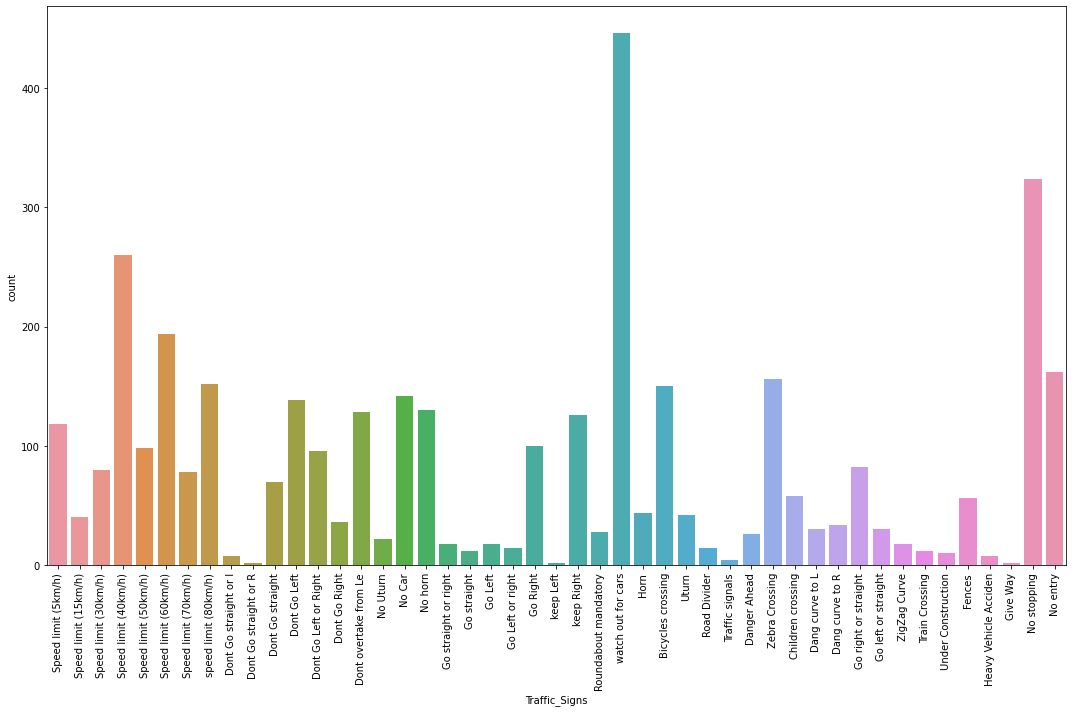

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [15.00, 10.00]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(dict(Traffic_Signs=Classno))

ax = sns.countplot(x="Traffic_Signs", data=df)
plt.xticks(rotation=90)

plt.show()

In [ ]:
df

,Traffic_Signs
0,Speed limit (5km/h)
1,Speed limit (5km/h)
2,Speed limit (5km/h)
3,Speed limit (5km/h)
4,Speed limit (5km/h)
...,...
3813,No entry
3814,No entry
3815,No entry
3816,No entry


In [ ]:
print(df)

            Traffic_Signs
0     Speed limit (5km/h)
1     Speed limit (5km/h)
2     Speed limit (5km/h)
3     Speed limit (5km/h)
4     Speed limit (5km/h)
...                   ...
3813             No entry
3814             No entry
3815             No entry
3816             No entry
3817             No entry

[3818 rows x 1 columns]


#TRAFFIC SIGNS PLOT

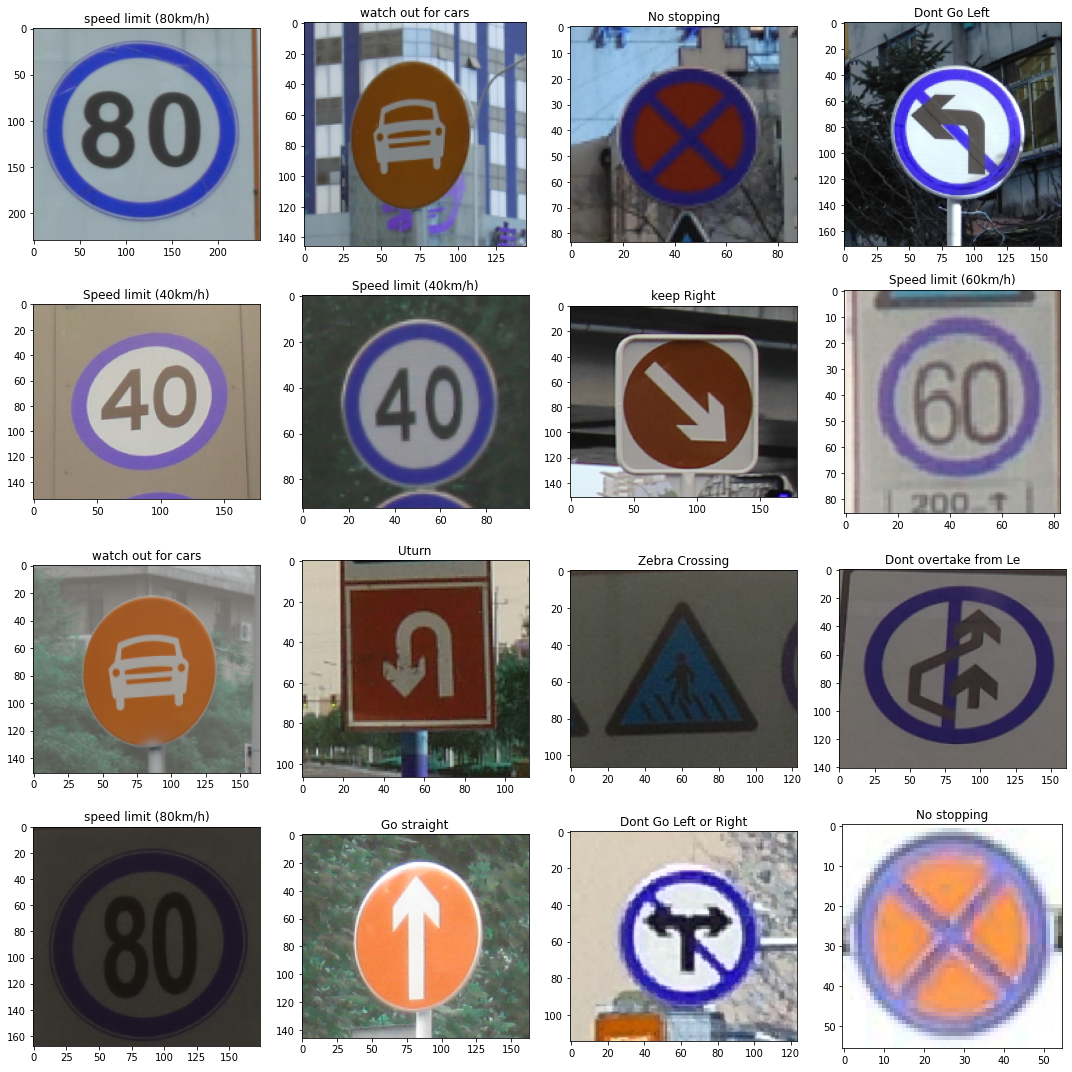

In [ ]:
import matplotlib.pyplot as plt



nrow = 4
ncol = 4
fig, axs = plt.subplots(nrows=nrow, ncols=nrow,figsize=(15, 15))
axs = np.array(axs)

for ax in axs.reshape(-1):
  x = random.randint(0,3817)
  ax.set_title(Classno[x])
  ax.imshow(Images[x])

#MODEL


In [ ]:
Classno = Classno1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Images,Classno,test_size=testratio)
X_train, X_validation ,Y_train, Y_validation = train_test_split(X_train,Y_train,test_size=validationratio)

In [ ]:
################################################
print("DATA SHAPES")
print("Train:  ")
print(X_train.shape,Y_train.shape)
print("Validation:   ")
print(X_validation.shape, Y_validation.shape)
print("Test:  ")
print(X_test.shape,Y_test.shape)

data=pd.read_csv(labelfile)
print("data_shape",data.shape,type(data))



DATA SHAPES
Train:  
(3092,) (3092,)
Validation:   
(344,) (344,)
Test:  
(382,) (382,)
data_shape (58, 2) <class 'pandas.core.frame.DataFrame'>


In [ ]:
def grayscale(img):
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(100,100)) 
    return img
def equalize(img):
    img=cv2.equalizeHist(img)
    return img
def preprocessing(img):
    img=grayscale(img)
    img=equalize(img)
    img=img/255.0
    return img

In [ ]:
X_train=np.array(list(map(preprocessing,X_train)))
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))





X_train=X_train.reshape(X_train.shape[0],100,100,1)
X_validation=X_validation.reshape(X_validation.shape[0],100,100,1)
X_test=X_test.reshape(X_test.shape[0],100,100,1)

datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)
datagen.fit(X_train)
batches=datagen.flow(X_train,Y_train,batch_size=20)
X_batch,Y_batch=next(batches)

Y_train=to_categorical(Y_train,noofclasses)
Y_validation=to_categorical(Y_validation,noofclasses)
Y_test=to_categorical(Y_test,noofclasses)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.utils import load_img, to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
def mymodel():
    nooffilters=32
    sizeoffilters=(3,3)
    sizeoffilters2=(3,3)
    sizeofpool=(2,2)
    noofnodes=500
    
    model=Sequential()
    model.add((Conv2D(32,(3,3),input_shape=(100,100,1),activation='relu')))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    model.add((Conv2D(64, (3, 3),activation='relu')))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=sizeofpool))
    model.add(Dropout(0.25))


    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(noofclasses,activation='softmax'))

    model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/best_model.h5', verbose=1, save_best_only=True)

early_stopping = EarlyStopping(patience=20)

learning_rate_reduction = ReduceLROnPlateau(
  monitor='val_accuracy', 
  patience=2, 
  verbose=1, 
  factor=0.5,
  min_lr=0.000001
)

callbacks = [
    checkpointer, 
    # early_stopping, 
    learning_rate_reduction
]

In [ ]:
X_train[0].shape

(100, 100, 1)

In [ ]:
###################33
model=mymodel()
history=model.fit(
    datagen.flow(X_train,Y_train, batch_size=batch_size_val),
    steps_per_epoch=steps_per_epoch_val,
    epochs=100,
    validation_data=(X_validation,Y_validation),
    shuffle=1,
    callbacks=callbacks
)
score=model.evaluate(X_test,Y_test,verbose=0)
print('Test Score: ',score[0])
print('Test Accuracy: ',score[1])

Epoch 1/100
 99/100 [============================>.] - ETA: 0s - loss: 3.0941 - accuracy: 0.2812
Epoch 1: val_loss improved from inf to 8.62593, saving model to /content/drive/MyDrive/Colab Notebooks/best_model.h5
100/100 [==============================] - 4s 27ms/step - loss: 3.0923 - accuracy: 0.2809 - val_loss: 8.6259 - val_accuracy: 0.0930 - lr: 0.0010
Epoch 2/100
 98/100 [============================>.] - ETA: 0s - loss: 1.9563 - accuracy: 0.4994
Epoch 2: val_loss did not improve from 8.62593
100/100 [==============================] - 2s 24ms/step - loss: 1.9489 - accuracy: 0.4987 - val_loss: 21.0015 - val_accuracy: 0.0000e+00 - lr: 0.0010
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 1.5828 - accuracy: 0.5604
Epoch 3: val_loss did not improve from 8.62593

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
100/100 [==============================] - 2s 23ms/step - loss: 1.5842 - accuracy: 0.5617 - val_loss: 19.7535 - val_accuracy: 

In [ ]:
history_values = history.history
history.history

{'loss': [3.092297077178955,
  1.9488730430603027,
  1.5841920375823975,
  1.1923187971115112,
  1.0007792711257935,
  0.8884020447731018,
  0.7635781764984131,
  0.6886358857154846,
  0.6432300806045532,
  0.564644455909729,
  0.5160179138183594,
  0.5248209834098816,
  0.42696189880371094,
  0.42184269428253174,
  0.3595162630081177,
  0.3359963893890381,
  0.3627847731113434,
  0.33905312418937683,
  0.30225709080696106,
  0.2781132161617279,
  0.2538484036922455,
  0.23987704515457153,
  0.25481152534484863,
  0.23758484423160553,
  0.23830698430538177,
  0.24787718057632446,
  0.24018807709217072,
  0.22987045347690582,
  0.22822599112987518,
  0.24832358956336975,
  0.22514116764068604,
  0.2143787443637848,
  0.22890961170196533,
  0.2451801747083664,
  0.24653325974941254,
  0.24322950839996338,
  0.22593849897384644,
  0.23088392615318298,
  0.2542382478713989,
  0.2245461791753769,
  0.2602847218513489,
  0.22103385627269745,
  0.22426725924015045,
  0.23786261677742004,
  0.

In [ ]:
# load best model
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/best_model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 batch_normalization_8 (Batc  (None, 98, 98, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 47, 47, 64)      

In [ ]:
epochs = 100

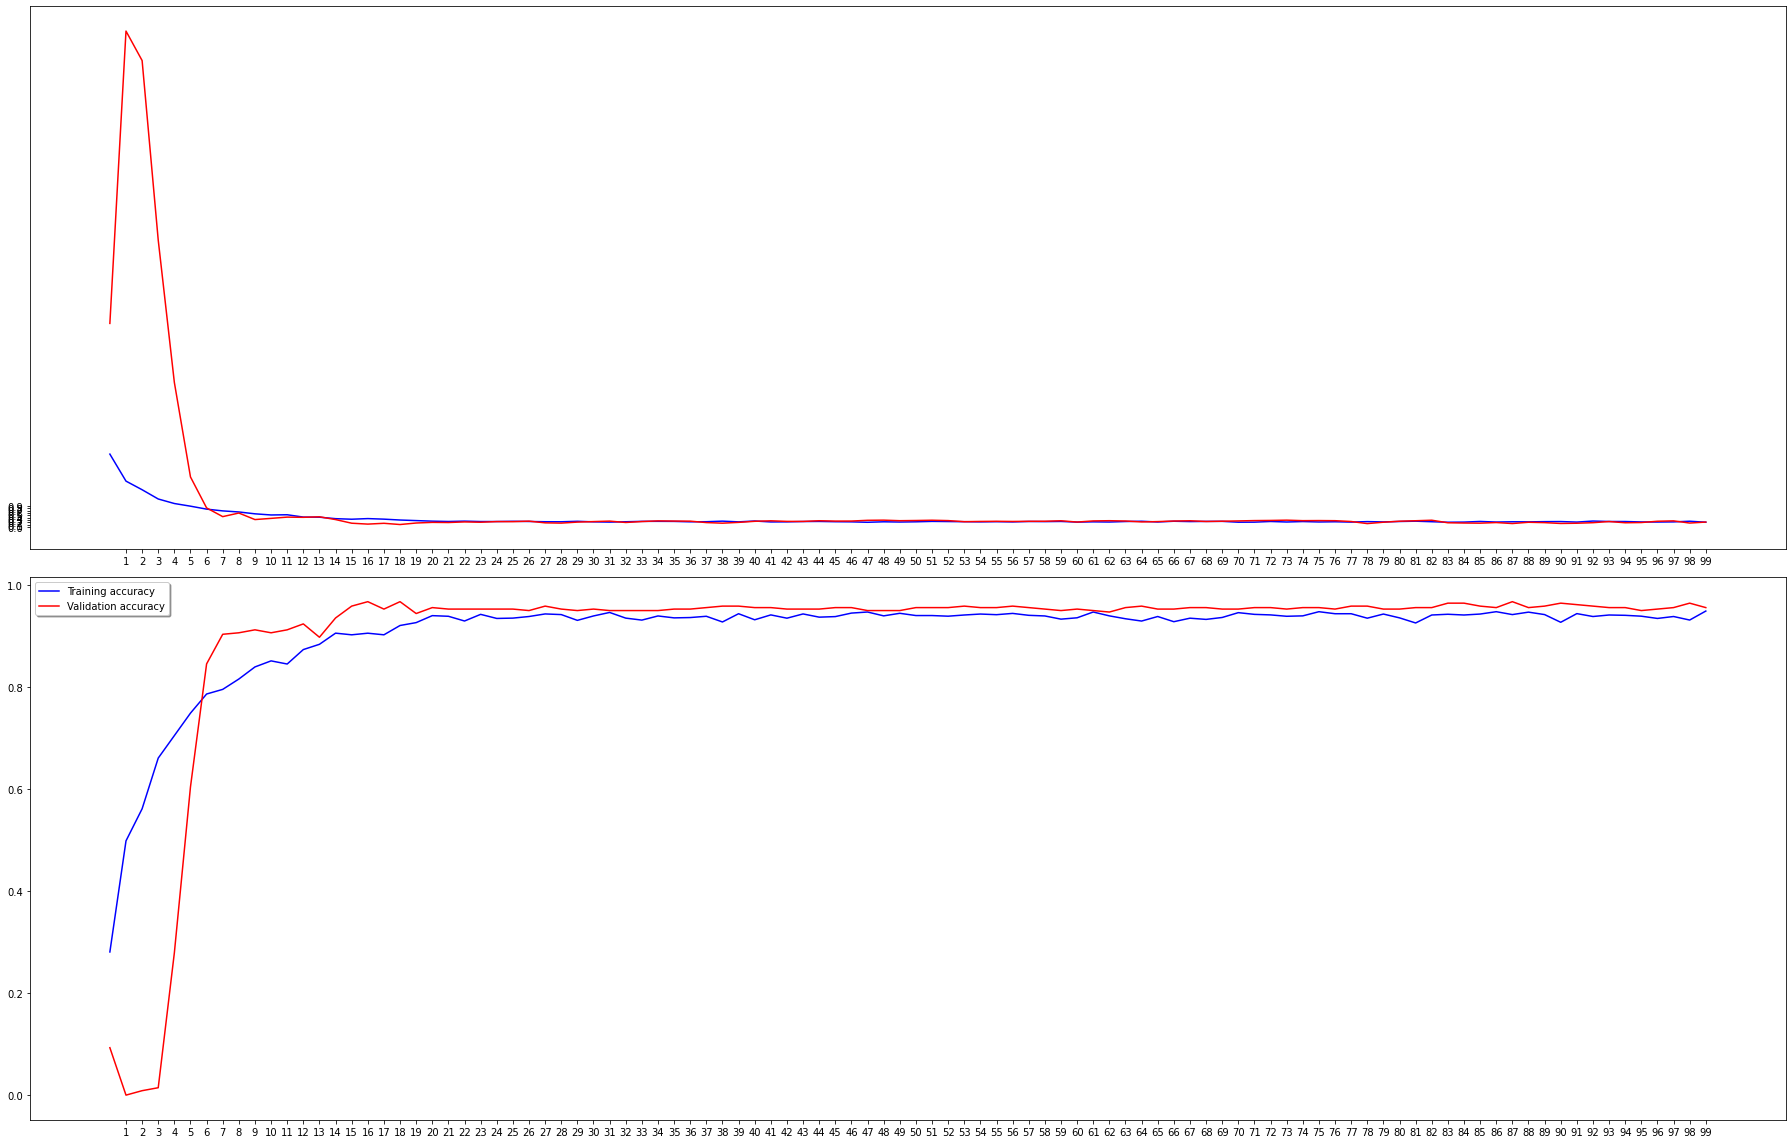

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(25, 16))
ax1.plot(history_values['loss'], color='b', label="Training loss")
ax1.plot(history_values['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history_values['accuracy'], color='b', label="Training accuracy")
ax2.plot(history_values['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [ ]:
X_test[0].shape

(100, 100, 1)

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/nn/traffic_Data/TEST/"
batch_size_val=16
steps_per_epoch_val=100
epochs_val=20
imageDimensions=(32,32,3)
testratio=0.1
validationratio=0.1

In [ ]:
test_filenames = os.listdir(path)
test_data = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_data.shape[0]

In [ ]:
test_data.shape

(1994, 1)

In [ ]:
test_data.head()

,filename
0,026_0014_j.png
1,026_0023_j.png
2,024_1_0013.png
3,026_0005_j.png
4,026_0052_j.png


In [ ]:
count=0
Images_Test=[]
#Classno_Test=[]
test_photos=os.listdir("/content/drive/MyDrive/Colab Notebooks/nn/traffic_Data/TEST/")
print("Total Images Detected: ",len(mylist))
#noofclasses=len(mylist)
print("Importing Images .....")
for y in test_photos:
    current=cv2.imread(path + "/" + y)
    Images_Test.append(current)
        #Classno.append(count)
    #print(str(count) + "/" + str(noofclasses))
    count=count+1
    print(count)
#print(str(noofclasses)+("/")+str(noofclasses))
print(" ")
#print(Images)
#print(Classno)
Images_Test=np.array(Images_Test)
#Classno=np.array(Classno)






Total Images Detected:  47
Importing Images .....
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
26

<ipython-input-356-f17a4511a073>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Images_Test=np.array(Images_Test)


In [ ]:
Images_Test.shape

(1994,)

In [ ]:
print(Images_Test[0])

[[[100 113 126]
  [112 127 141]
  [101 115 128]
  ...
  [121 133 153]
  [128 143 159]
  [129 145 158]]

 [[104 115 126]
  [119 132 144]
  [117 130 144]
  ...
  [121 138 161]
  [119 139 158]
  [123 144 160]]

 [[112 125 140]
  [126 140 156]
  [122 136 151]
  ...
  [114 133 159]
  [114 135 160]
  [117 139 159]]

 ...

 [[123 115 119]
  [110 109 117]
  [109 121 134]
  ...
  [185 174 154]
  [190 179 164]
  [194 185 177]]

 [[148 130 132]
  [125 113 119]
  [113 114 126]
  ...
  [188 189 183]
  [190 190 185]
  [190 188 186]]

 [[158 145 139]
  [133 121 124]
  [121 119 129]
  ...
  [175 181 183]
  [181 186 187]
  [184 187 186]]]


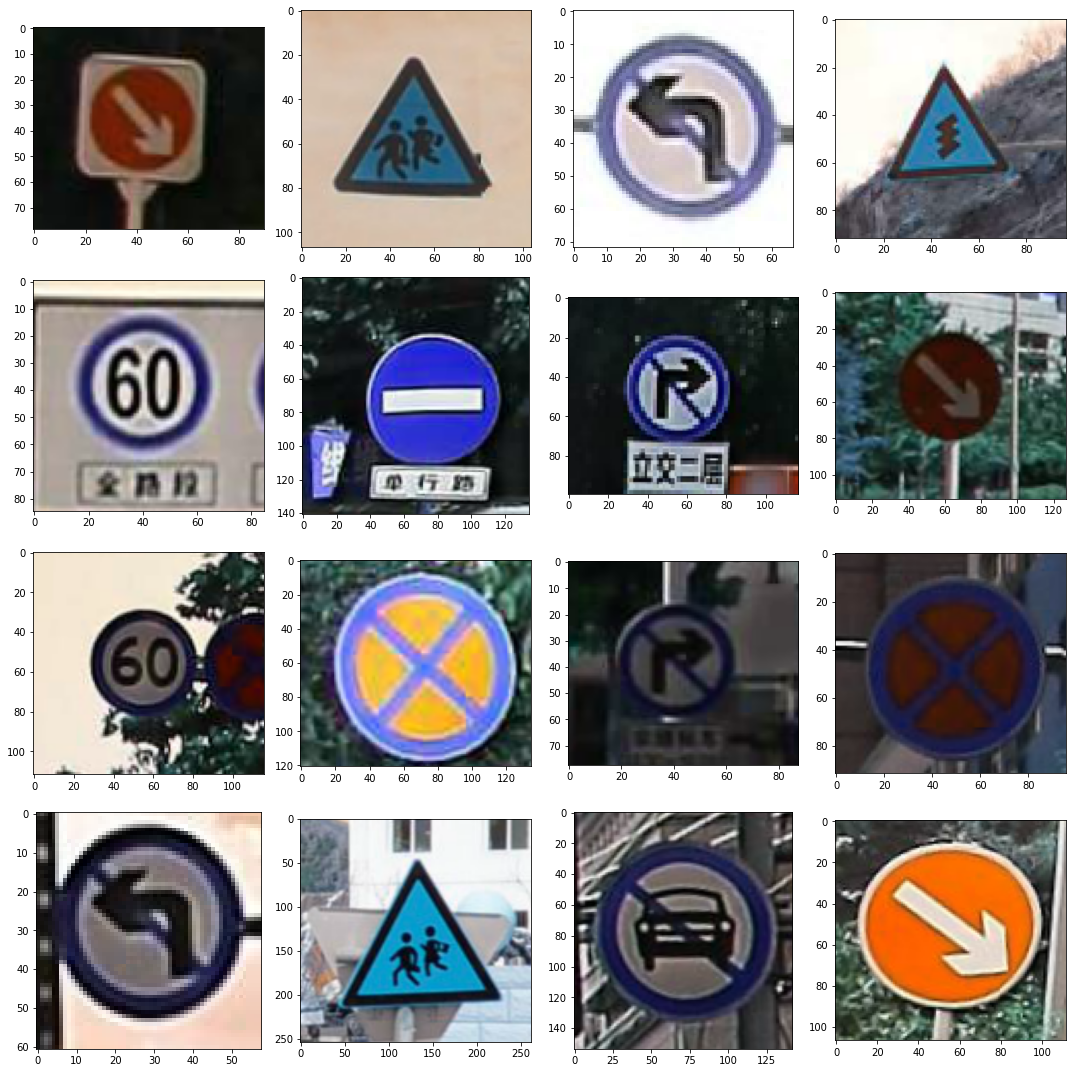

In [ ]:
import matplotlib.pyplot as plt



nrow = 4
ncol = 4
fig, axs = plt.subplots(nrows=nrow, ncols=nrow,figsize=(15, 15))
axs = np.array(axs)

for ax in axs.reshape(-1):
  x = random.randint(0,1993)
  #ax.set_title(Classno[x])
  ax.imshow(Images_Test[x])

In [ ]:
X_test.shape

(382, 100, 100, 1)

In [ ]:
Y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_test.shape

(382, 100, 100, 1)

In [ ]:



Images_Test[0].shape




(139, 152, 3)

In [ ]:
Images_Test=np.array(list(map(preprocessing,Images_Test)))
Images_Test = Images_Test.reshape(Images_Test.shape[0],100,100,1)

In [ ]:
Images_Test.shape

(1994, 100, 100, 1)

In [ ]:
predict = model.predict(Images_Test)

63/63 [==============================] - 1s 6ms/step


In [ ]:
predict

array([[2.2411222e-02, 8.0287363e-04, 1.9741334e-01, ..., 5.6646962e-04,
        2.2208225e-03, 4.4044941e-03],
       [5.0561791e-08, 2.9541090e-07, 1.0940561e-05, ..., 9.1669466e-07,
        3.3093017e-04, 4.0822880e-07],
       [6.0991332e-04, 3.8731105e-03, 1.9058785e-01, ..., 1.3413776e-03,
        4.3413140e-02, 6.3030489e-02],
       ...,
       [8.8262819e-03, 7.1435577e-05, 1.0475845e-03, ..., 2.8725297e-04,
        2.8131793e-03, 8.8247105e-02],
       [5.5232206e-03, 4.2068842e-03, 2.2482381e-03, ..., 5.3060423e-03,
        6.2140445e-03, 5.4610678e-06],
       [4.8057050e-08, 1.2734044e-08, 1.9561432e-05, ..., 1.1643290e-06,
        4.1431836e-06, 2.5956004e-08]], dtype=float32)

In [ ]:
test_data.shape

(1994, 1)

In [ ]:
test_data.head()

,filename
0,026_0014_j.png
1,026_0023_j.png
2,024_1_0013.png
3,026_0005_j.png
4,026_0052_j.png


In [ ]:


test_data['category'] = np.argmax(predict, axis=-1)
label_map = {
 0   :"Speed limit (5km/h)",
1	:"Speed limit (15km/h)",
2	:"Speed limit (30km/h)",
3	:"Speed limit (40km/h)",
4	:"Speed limit (50km/h)",
5	:"Speed limit (60km/h)",
6	:"Speed limit (70km/h)",
7	:"speed limit (80km/h)",
8	:"Dont Go straight or left",
9	:"Dont Go straight or Right",
10	:"Dont Go straight",
11	:"Dont Go Left",
12	:"Dont Go Left or Right",
13	:"Dont Go Right",
14	:"Dont overtake from Left",
15	:"No Uturn",
16	:"No Car",
17	:"No horn",
18	:"Go straight or right",
19	:"Go straight",
20	:"Go Left",
21	:"Go Left or right",
22	:"Go Right",
23	:"keep Left",
24	:"keep Right",
25	:"Roundabout mandatory",
26	:"watch out for cars",
27	:"Horn",
28	:"Bicycles crossing",
29	:"Uturn",
30	:"Road Divider",
31	:"Traffic signals",
32	:"Danger Ahead",
33	:"Zebra Crossing",
34	:"Children crossing",
35	:"Dang curve to L",
36	:"Dang curve to R",
37	:"Go right or straight",
38	:"Go left or straight",
39	:"ZigZag Curve",
40	:"Train Crossing",
41	:"Under Construction",
42	:"Fences",
43	:"Heavy Vehicle Accidents",
44	:"Give Way",
45	:"No stopping",
46	:"No entry"
}
test_data['category'] = test_data['category'].replace(label_map)
test_data


,filename,category
0,026_0014_j.png,Dont Go Left
1,026_0023_j.png,keep Right
2,024_1_0013.png,Speed limit (30km/h)
3,026_0005_j.png,keep Right
4,026_0052_j.png,keep Right
...,...,...
1989,026_0031_j.png,keep Right
1990,026_0002_j.png,keep Right
1991,026_0042_j.png,keep Right
1992,026_0035_j.png,keep Right


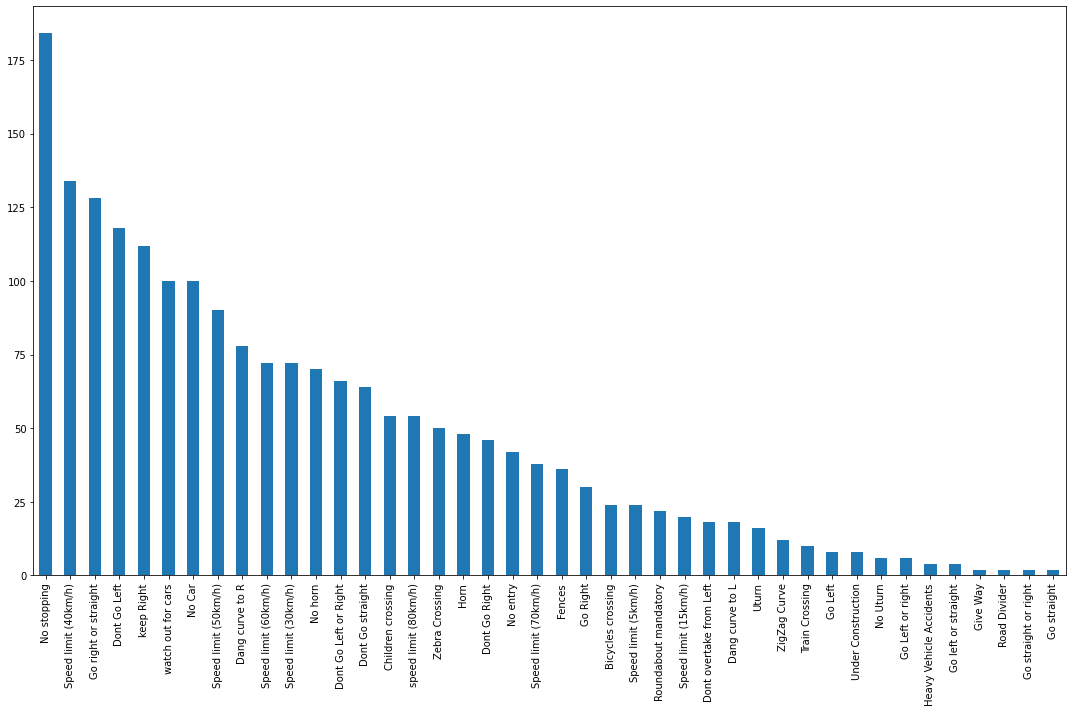

In [ ]:
test_data['category'].value_counts().plot.bar()

In [ ]:
from keras.utils import load_img

sample_test = test_data[0:150]
sample_test.head()
plt.figure(figsize=(20, 100))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/MyDrive/Colab Notebooks/nn/traffic_Data/TEST/"+filename, target_size=(100, 100))
    plt.subplot(30, 5, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.